In [27]:
%matplotlib inline
import numpy as np
import openslide
import cv2
import matplotlib.pyplot as plt
import sys
import os
from numpy import linalg as LA
sys.path.append('../')

In [8]:
data_path = '../patches/train_data/Stomach/M/train_stomach_M_0003/'
img_list = os.listdir(data_path)

In [75]:
data_path + img_list[0]

'../patches/train_data/Stomach/M/train_stomach_M_0003/192_81.jpg'

(128, 128, 3)


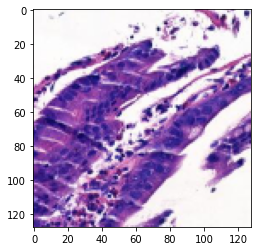

In [131]:
img = cv2.imread(data_path + img_list[8])
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, dsize=(128, 128))
print(img.shape)
plt.imshow(img)

(128, 128, 3)


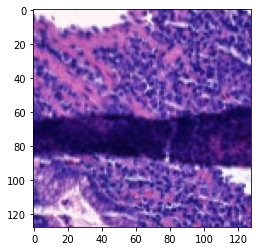

In [120]:
img = cv2.imread(data_path + img_list[9])
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, dsize=(128, 128))
print(img.shape)
plt.imshow(img)

(128, 128, 3)


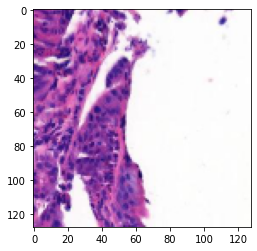

In [121]:
img = cv2.imread(data_path + img_list[11])
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, dsize=(128, 128))
print(img.shape)
plt.imshow(img)

(128, 128, 3)


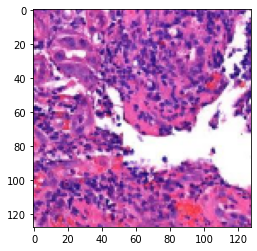

In [122]:
img = cv2.imread(data_path + img_list[12])
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, dsize=(128, 128))
print(img.shape)
plt.imshow(img)

In [11]:
hist, bins = np.histogram(img, bins=10)

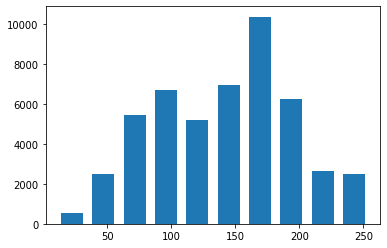

In [12]:
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width)
plt.show()

In [13]:
img_norm = img/255.
img_flat = img_norm.reshape(-1,3)
rgb_mean = np.mean(img_flat, axis=0)
print(rgb_mean)

[0.56768751 0.38350016 0.70917346]


In [14]:
img_flat_mean = img_flat - rgb_mean
img_flat_mean.shape

(16384, 3)

In [15]:
rgb_covariance = np.matmul(img_flat_mean.T, img_flat_mean)/(img_flat_mean.shape[0] -1)
rgb_covariance

array([[0.03244868, 0.02938186, 0.01825852],
       [0.02938186, 0.03221858, 0.01886409],
       [0.01825852, 0.01886409, 0.01295783]])

In [16]:
# img_flat_mean

In [18]:
eigenvalue, eigenmat = LA.eig(rgb_covariance)
print(eigenvalue)
print(eigenmat)

[0.0731609  0.00307478 0.00138941]
[[ 0.64750963  0.75775549 -0.08085731]
 [ 0.6488327  -0.60384164 -0.4630242 ]
 [ 0.39968414 -0.24734976  0.88264981]]


In [93]:
# eigenvalue, eigenmat = LA.eig(rgb_covariance)
# print(eigenvalue)
# print(eigenmat)

[0.23315364 0.00259851 0.00090394]
[[-0.58422627 -0.76185766 -0.27973661]
 [-0.70825068  0.646904   -0.28265915]
 [-0.39630877 -0.03298674  0.91752451]]


In [141]:
eigen_value_list = []
eigen_mat_list = []
for i in img_list :
    path = data_path + i
#     print(path)
    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#     img = cv2.resize(img, dsize=(128, 128))    

    img_norm = img/255.
    img_flat = img_norm.reshape(-1,3)
    rgb_mean = np.mean(img_flat, axis=0)
    img_flat_mean = img_flat - rgb_mean
    rgb_covariance = np.matmul(img_flat_mean.T, img_flat_mean)/(img_flat_mean.shape[0] -1)
#     rgb_covariance = np.matmul(img_flat.T, img_flat)/(img_flat.shape[0] -1)
    eigenvalue, eigenmat = LA.eig(rgb_covariance)
    eigen_value_list.append(eigenvalue)
    eigen_mat_list.append(eigenmat)
    

In [142]:
new_eigen_mat_list = []
for m in eigen_mat_list :
    if m[0,0] < 0 :
        new_eigen_mat_list.append(m*(-1.))
    else :
        new_eigen_mat_list.append(m)

In [145]:
np_mat = np.stack(new_eigen_mat_list).reshape(len(new_eigen_mat_list), -1)
np_mat.shape

(873, 9)

In [146]:
np.mean(np_mat, axis=0).reshape(3,3)

array([[ 0.59059404,  0.74703615,  0.13702375],
       [ 0.69712856, -0.59421564,  0.0173579 ],
       [ 0.40133266, -0.06045802, -0.25623026]])

In [139]:
np.mean(np_mat, axis=0).reshape(3,3)

array([[ 0.59133074,  0.78151944, -0.00639187],
       [ 0.49226128, -0.40312015, -0.20576139],
       [ 0.63463514, -0.42255044,  0.20779318]])

In [91]:
eigenvector.shape

(3, 3)

In [98]:
he_img = np.matmul(img, eigenmat.T )
he_img.shape

(128, 128, 3)

In [93]:
# he_img[:,:,1]

In [94]:
# LA.inv(eigenmat)

In [95]:
# back_img = np.matmul(he_img, LA.inv(eigenmat).T)

In [1]:
from __future__ import print_function

import histomicstk as htk

import numpy as np
import scipy as sp

import skimage.io
import skimage.measure
import skimage.color

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline

#Some nice default configuration for plots
plt.rcParams['figure.figsize'] = 15, 15
plt.rcParams['image.cmap'] = 'gray'
titlesize = 24

(128, 128, 3)


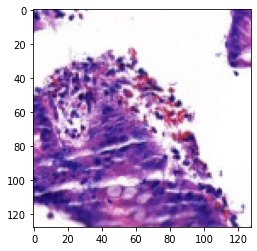

In [31]:
data_path = '../patches/train_data/Stomach/M/train_stomach_M_0003/'
img_list = os.listdir(data_path)
img = cv2.imread(data_path + img_list[18])
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, dsize=(128, 128))
print(img.shape)
plt.imshow(img)

In [96]:
w_est_mat = []
I_0 = 255
for i in img_list :
    path = data_path + i
#     print(path)
    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    w_est = htk.preprocessing.color_deconvolution.rgb_separate_stains_macenko_pca(img, I_0)
    w_est_mat.append(w_est)

/home/beomgon/anaconda3/envs/pytorch/lib/python3.8/site-packages/histomicstk/preprocessing/color_conversion/rgb_to_sda.py:48: RuntimeWarning: divide by zero encountered in log
  im_sda = -np.log(im_rgb/(1.*I_0)) * 255/np.log(I_0)


In [149]:
np.mean(np.stack(w_est_mat).reshape(len(w_est_mat), -1), axis=0).reshape(3,3)

array([[ 0.210491  ,  0.63846725,  0.03475129],
       [ 0.92725723,  0.72588785,  0.2917292 ],
       [ 0.2971364 ,  0.24990528, -0.94785774]])

In [32]:
I_0 = 255
w_est = htk.preprocessing.color_deconvolution.rgb_separate_stains_macenko_pca(img, I_0)
w_est

array([[ 0.20339768,  0.60081705, -0.26349777],
       [ 0.88527246,  0.76569535,  0.46089983],
       [ 0.41823683,  0.22962905, -0.84743157]])

In [30]:
LA.inv(w_est)

array([[-1.90470998,  1.49055988,  0.53466284],
       [ 2.38179145, -0.63400992, -0.24628059],
       [-0.01135017,  0.3247318 , -0.94573803]])

In [25]:
# create stain to color map
stain_color_map = htk.preprocessing.color_deconvolution.stain_color_map
print('stain_color_map:', stain_color_map, sep='\n')

# specify stains of input image
stains = ['hematoxylin',  # nuclei stain
          'eosin',        # cytoplasm stain
          'dab']         # set to null if input contains only two stains

# create stain matrix
W = np.array([stain_color_map[st] for st in stains]).T

stain_color_map:
{'hematoxylin': [0.65, 0.7, 0.29], 'eosin': [0.07, 0.99, 0.11], 'dab': [0.27, 0.57, 0.78], 'null': [0.0, 0.0, 0.0]}


In [26]:
print(W)

[[0.65 0.07 0.27]
 [0.7  0.99 0.57]
 [0.29 0.11 0.78]]


In [33]:
import girder_client
import numpy as np
from skimage.transform import resize
from matplotlib import pylab as plt
from matplotlib.colors import ListedColormap
from histomicstk.preprocessing.color_normalization import reinhard
from histomicstk.saliency.tissue_detection import (
    get_slide_thumbnail, get_tissue_mask)
from histomicstk.annotations_and_masks.annotation_and_mask_utils import (
    get_image_from_htk_response)
from histomicstk.preprocessing.color_normalization.\
    deconvolution_based_normalization import deconvolution_based_normalization
from histomicstk.preprocessing.color_deconvolution.\
    color_deconvolution import color_deconvolution_routine, stain_unmixing_routine
from histomicstk.preprocessing.augmentation.\
    color_augmentation import rgb_perturb_stain_concentration, perturb_stain_concentration

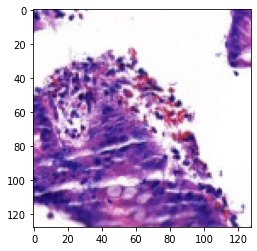

In [36]:
augmented_img = rgb_perturb_stain_concentration(img)
plt.imshow(img)

In [53]:
np.cos(5.5*np.pi/180)

0.9953961983671789

In [52]:
np.sin(5.5*np.pi/180)

0.09584575252022398

In [51]:
np.cos(10*np.pi/180)**2 + np.sin(10*np.pi/180)**2

0.9999999999999999

In [54]:
np.random.uniform(-10, 10)

-4.3630690714453335

In [55]:
-np.sin(0)

-0.0

In [116]:
# theta1 = np.random.uniform(-1*theta1, theta1)*np.pi/180
theta1 = 9 *np.pi/180
rotate_mat1 = np.array(
    [[1., 0, 0],
    [0, np.cos(theta1), -np.sin(theta1)],
    [0, np.sin(theta1), np.cos(theta1)]])

rotate_mat2 = np.array(
    [[np.cos(theta1), 0, np.sin(theta1)],
    [0, 1., 0.],
    [-np.sin(theta1), 0., np.cos(theta1)]])

rotate_mat3 = np.array(
    [[np.cos(theta1), -np.sin(theta1), 0],
    [np.sin(theta1), np.cos(theta1), 0.],
    [0, 0., 1.]])

In [117]:
np.matmul(np.matmul(rotate_mat3, np.matmul(rotate_mat2, rotate_mat1)), w_est_mat[0])

array([[ 0.10508678,  0.61602756, -0.10400113],
       [ 0.91615711,  0.74555802,  0.39694368],
       [ 0.38679829,  0.25427011, -0.91193173]])

In [110]:
np.matmul(np.matmul(rotate_mat3, np.matmul(rotate_mat2, rotate_mat1)), w_est_mat[0])

array([[ 0.15152693,  0.65466458,  0.03658314],
       [ 0.93676003,  0.70984784,  0.31362004],
       [ 0.31546827,  0.259866  , -0.94884358]])

In [66]:
test_conv_mat = np.array([[ 2.        ,  1.        ,  0.        ],
                           [ 1.        ,  1, 0],
                           [ 0.        ,  0,  1.]])

In [67]:
np.matmul(test_conv_mat, img[0,0,:])

array([450., 293., 215.])

In [69]:
np.matmul(img, test_conv_mat.T)[0,0,:]

array([450., 293., 215.])